# 시각화 모듈(라이브러리)
- Matplotblib
- Seaborn

In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 56.1 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import koreanize_matplotlib

In [ ]:
# seaborn에서 제공하는 데이터셋

penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

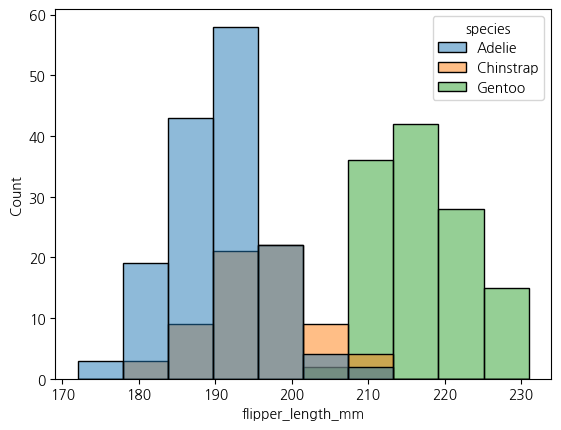

In [ ]:
sns.histplot(data=penguins, x='flipper_length_mm', hue='species')  # hue 범례지정

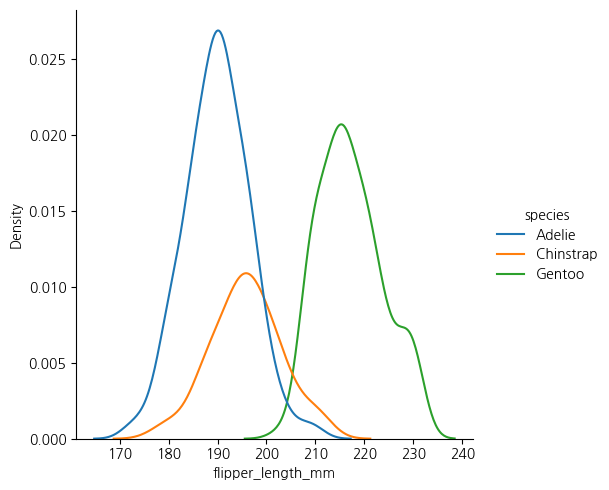

In [ ]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='kde')  # 커널밀도추정

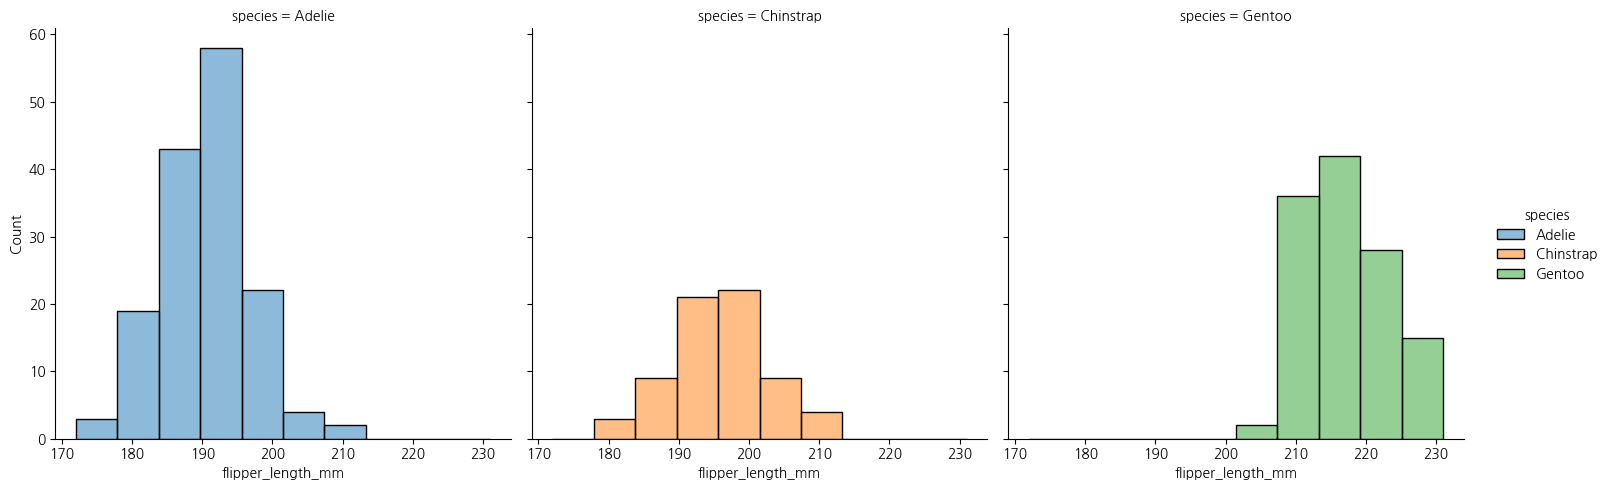

In [ ]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species')

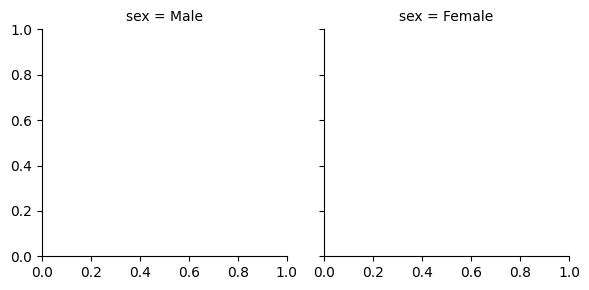

In [ ]:
import matplotlib.pyplot as plt

# f, ax = plt.subplots(1, 2)  # plt.subplot
g = sns.FacetGrid(penguins, col='sex')

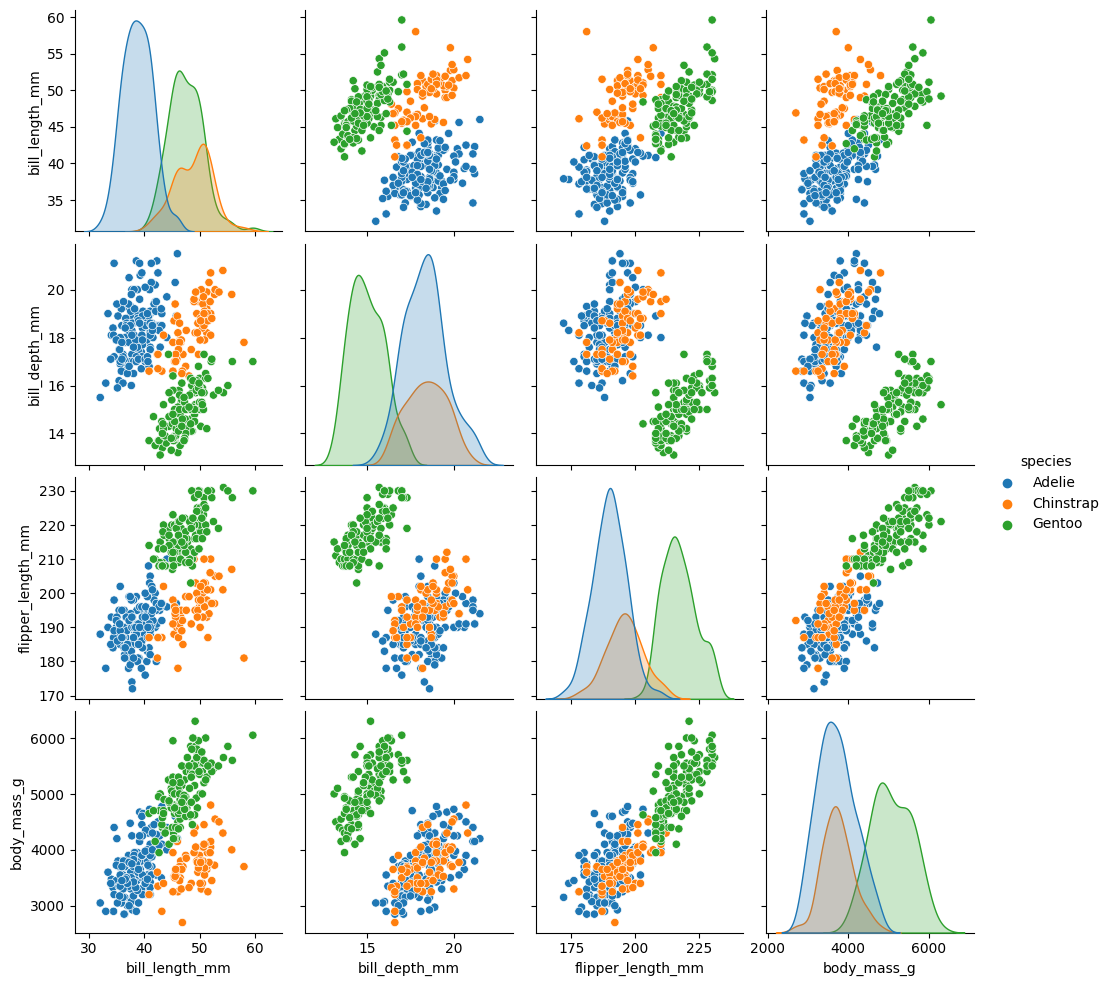

In [ ]:
sns.pairplot(data=penguins, hue='species')  # 상관관계에 대한 그래프 -> 변수들 간의 상관관계를 한 번에 보여줌

<ipython-input-14-016adabe1e9b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score')  # 상관관계는 수치형 데이터


<Axes: xlabel='Task', ylabel='Model'>

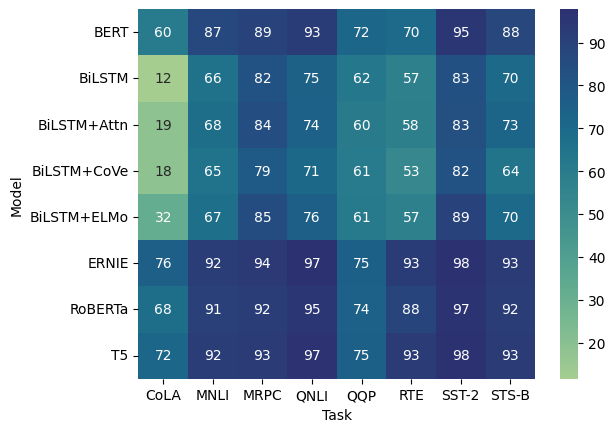

In [ ]:
glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score')  # 상관관계는 수치형 데이터
sns.heatmap(glue, annot=True, cmap='crest')

In [ ]:
# 변수 간 상관관계 -> pairplot, heatmap

## 상관관계

- 두 변수 간의 선형 관계(비례, 반비례)를 설명
- 상관관계가 있다고 해서 인과관계를 가지는 것은 아님
- -1 ~ 1 -> 양 끝 값에 가까울수록 상관성이 높다

In [ ]:
# 상관관계 그래프를 그리기는 쉬움 -> 왜 그리는지, 어떻게 해석할지

# 불러오고, 살펴보고, 전처리 -> 상관관계 추가

# IBM Attriction 데이터
- IBM에서 만든 데이터 (가상 데이터)
- 여러 변수들(연봉, 직업만족도...) -> 퇴사
- 여러 변수들 + 퇴사
- 연봉, 만족도, 가족, ... 퇴사(o)
-연봉, 만족도, 가족, ... 퇴사(x)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition_2.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
df.info()  # 데이터 타입 -> int, float / object는 살펴보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df = df[:1000]
df.shape

(1000, 35)

## 데이터 전처리
- data type
- drop

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# object(string) -> 어떤 형태로 변환을 해야하는가?
# object 인식이 어려운 경우가 많음 -> 2 가지 : one-hot encoding(0, 1), 여러가지 : label encoding(0, 1, 2, 3, ...)

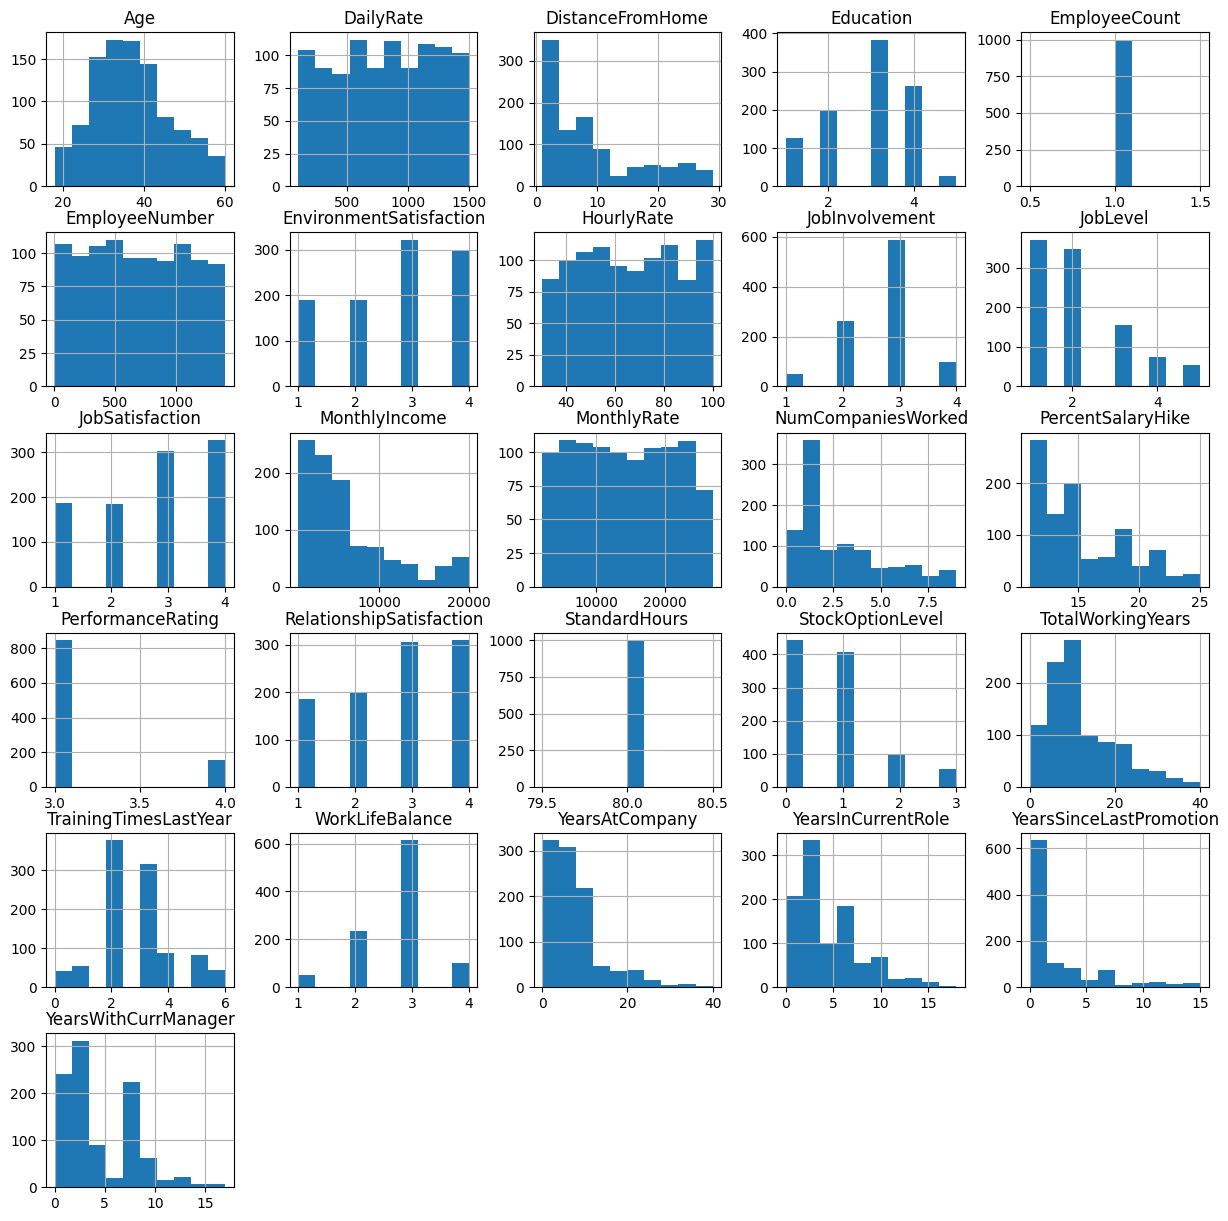

In [ ]:
df.hist(figsize=(15, 15))
plt.show()  # 전체 데이터 히스토그램 # EmployeeCount, StandardHours

In [ ]:
# 퇴사인원 확인

df['Attrition'].value_counts()

# Attrition pie graph

No     833
Yes    167
Name: Attrition, dtype: int64

In [ ]:
# 상관관계 파악

corr = df.corr()
corr.shape

<ipython-input-13-c751043ad636>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


(26, 26)

<Axes: >

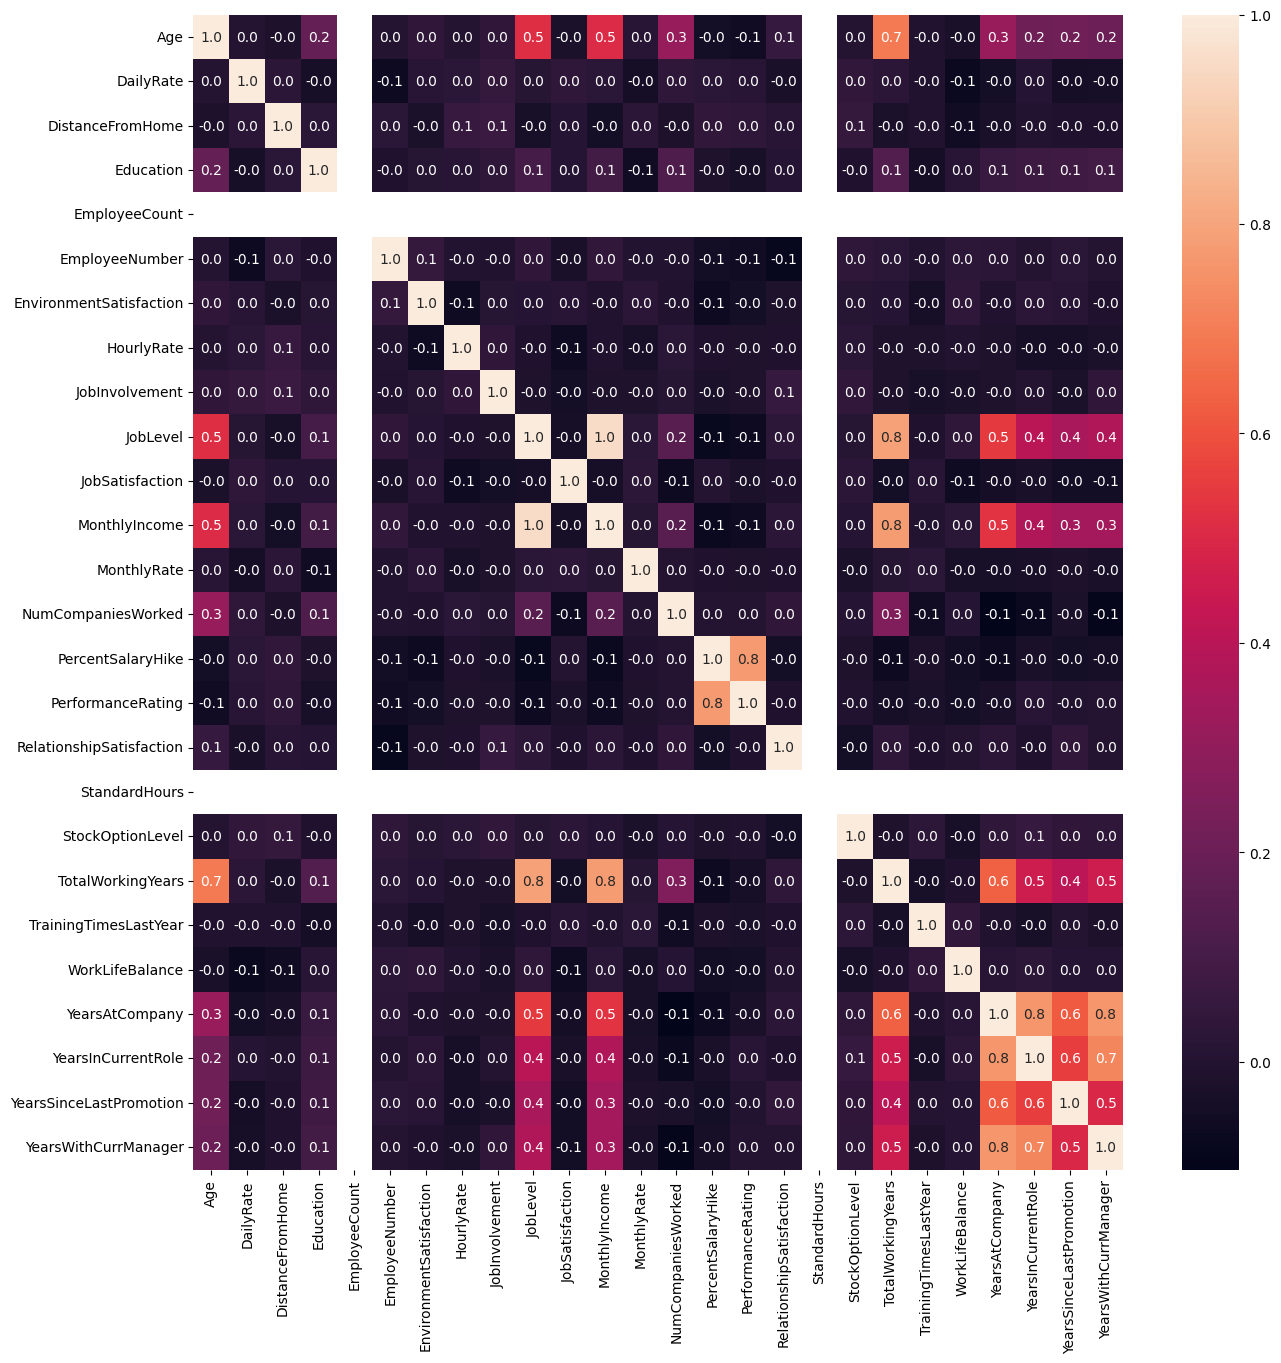

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, fmt='.1f', annot=True)  # 문자로 된 컬럼들이 빠짐
# 0.3 < a : 상관관계가 있다
# 0.7 < a : 상관관계가 높다
# PercentSalaryHike - PerformanceRating  0.8
# TotalWorkingYears - Age 0.7
# TotalWorkingYears - Joblevel 0.8
# TotalWorkingYears - MonthlyIncome 0.8
# YearsWithCurrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsInCurrentRole 0.7

### 필요없는 데이터 drop 시키기

In [ ]:
# EmployeeCount
# StandardHours

In [ ]:
df['EmployeeCount'].head()

0    1
1    1
2    1
3    1
4    1
Name: EmployeeCount, dtype: int64

In [ ]:
df['StandardHours'].head()

0    80
1    80
2    80
3    80
4    80
Name: StandardHours, dtype: int64

In [ ]:
df = df.drop(['EmployeeCount', 'StandardHours'], axis=1)

In [ ]:
df.shape

(1000, 33)

### 상관관계가 높은 변수들 위주로 데이터 탐색하기

In [ ]:
# PercentSalaryHike - PerformanceRating  0.8
# TotalWorkingYears - Age 0.7
# TotalWorkingYears - Joblevel 0.8
# TotalWorkingYears - MonthlyIncome 0.8
# YearsWithCurrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsInCurrentRole 0.7

In [ ]:
# 전체 직원 중 퇴사 인원 비율

attrition = df['Attrition'][df['Attrition'] == 'Yes'].count()
total = df['Attrition'].count()
attrition_p = (attrition / total) * 100
attrition_p     # 전체 직원 중 16.7%가 퇴사했다

16.7

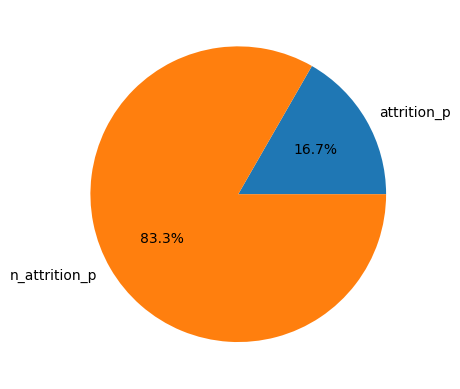

In [ ]:
attrition_p = (attrition / total) * 100
n_attrition_p = 100 - attrition_p

plt.pie([attrition_p, n_attrition_p], labels=['attrition_p', 'n_attrition_p'], autopct='%.1f%%')
plt.show()

In [ ]:
# 직업 레벨에 따른 퇴사 비율

df['JobLevel'].head()

0    2
1    2
2    1
3    1
4    1
Name: JobLevel, dtype: int64

In [ ]:
df['JobLevel'].value_counts()
# Entry, Mid, Senior, Lead, Excutive

1    370
2    347
3    155
4     74
5     54
Name: JobLevel, dtype: int64

In [ ]:
# pandas categorical

df['JobLevel'] = pd.Categorical(df['JobLevel']).rename_categories(['Entry', 'Mid', 'Senior', 'Lead', 'Excutive'])

df['JobLevel'].value_counts()

Entry       370
Mid         347
Senior      155
Lead         74
Excutive     54
Name: JobLevel, dtype: int64

In [ ]:
# df -> Attrition Yes, joblevel

attrition_joblevel = df[df['Attrition'] == 'Yes']['JobLevel'].value_counts()
attrition_joblevel

Entry       101
Mid          35
Senior       22
Excutive      5
Lead          4
Name: JobLevel, dtype: int64

In [ ]:
df['JobLevel']  # 전체 레벨 분포
attrition_joblevel  # 퇴사자들 중 레벨 분포

In [ ]:
df['JobLevel'].sort_values()  # 값의 크기에 따라서
# sort_values(ascending=True)
# sort_values(by='JobLevel') string, list

# 여러 컬럼들 -> 리스트

769       Entry
762       Entry
763       Entry
269       Entry
764       Entry
         ...   
244    Excutive
922    Excutive
237    Excutive
233    Excutive
270    Excutive
Name: JobLevel, Length: 1000, dtype: category
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Excutive']

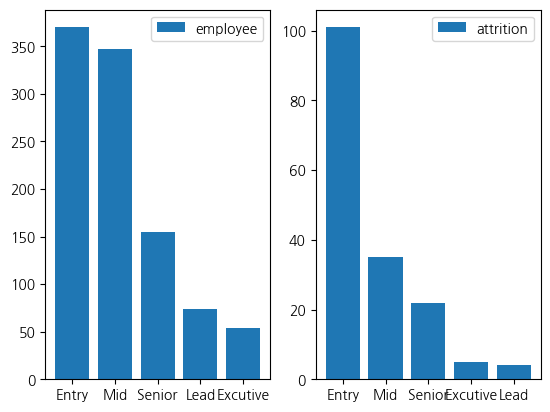

In [ ]:
# df['JobLevel'].unique()  # x
# df['JobLevel'].value_counts()  # y

plt.subplot(1, 2, 1)
plt.bar(df["JobLevel"].value_counts().index, df['JobLevel'].value_counts(), label='employee')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(attrition_joblevel.index.values, attrition_joblevel, label='attrition')
plt.legend()

plt.show()

In [ ]:
# 나이에 따른 퇴사 비율

df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [ ]:
df['Age'].value_counts()

35    51
34    49
30    45
36    44
31    42
33    41
32    41
29    41
37    39
38    37
27    35
40    35
42    33
28    32
26    29
41    29
45    27
39    24
50    24
43    23
46    22
44    21
25    20
51    18
24    16
52    16
55    15
53    14
49    12
47    12
48    12
22    12
54    12
58    10
59    10
21    10
20     9
19     9
56     9
23     7
18     6
60     4
57     3
Name: Age, dtype: int64

In [ ]:
# 나이대 구간별로 나누기

df['Age'].describe()

count    1000.000000
mean       36.992000
std         9.417783
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [ ]:
df['Age_10'] = (df['Age'] >= 10) & (df['Age'] < 20)
df['Age_10'].value_counts()

False    985
True      15
Name: Age_10, dtype: int64

In [ ]:
df['Age_10'] = (df['Age'] // 10) == 1
df['Age_10'].value_counts()

False    985
True      15
Name: Age_10, dtype: int64

In [ ]:
df['Age_10'] = df['Age'][(df['Age'] // 10) == 1]
df['Age_20'] = df['Age'][(df['Age'] // 10) == 2]
df['Age_30'] = df['Age'][(df['Age'] // 10) == 3]
df['Age_40'] = df['Age'][(df['Age'] // 10) == 4]
df['Age_50'] = df['Age'][(df['Age'] // 10) == 5]
df['Age_60'] = df['Age'][(df['Age'] // 10) == 6]

In [ ]:
# Age 컬럼에 값만 각각 바꿔줌

df['Age_40']

0      41.0
1      49.0
2       NaN
3       NaN
4       NaN
       ... 
995    43.0
996     NaN
997     NaN
998     NaN
999    42.0
Name: Age_40, Length: 1000, dtype: float64

In [ ]:
# 여러 개의 컬럼들이 생성
# 합쳐주기(컬럼 기준) -> 병합 : concat, merge
# join -> outer, inner, left, right
df['Age_10'] # 시리즈 형태(컬럼) : 인덱스가 같다

In [ ]:
ages = [df['Age_10'], df['Age_20'], df['Age_30'], df['Age_40'], df['Age_50'], df['Age_60']]
age_cols = pd.concat(ages, axis=1)

,Age_10,Age_20,Age_30,Age_40,Age_50,Age_60
0,NaN,NaN,NaN,41.0,NaN,NaN
1,NaN,NaN,NaN,49.0,NaN,NaN
2,NaN,NaN,37.0,NaN,NaN,NaN
3,NaN,NaN,33.0,NaN,NaN,NaN
4,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
995,NaN,NaN,NaN,43.0,NaN,NaN
996,NaN,27.0,NaN,NaN,NaN,NaN
997,NaN,27.0,NaN,NaN,NaN,NaN
998,NaN,26.0,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np

In [ ]:
# 조건에 따라서 값을 넣어줌
# 컬럼, 행으로 값을 넣어주어야 함
# 행기준으로 데이터를 순회하면서 값이 있는 것을 새로운 컬럼에 넣어준다.

# numpy where : np.where(조건, 참일 때 넣을 값, 거짓일 때 넣을 값)

col_name = list(age_cols.colums)

col_dic = {
    'Age_10': 10,
    'Age_20': 20,
    'Age_30': 30
}

df['Ages'] = ''

for col, age in col_dic.items():
    df.loc[df[col].notnull(), 'Ages'] = age

In [ ]:
# loc
# cities = region.loc[:, region.columns[:-1]]
# df.loc['label', 'col : 변하는 부분']

In [ ]:
'''
행에 다른 값을 찾아갈 때

where
np.where(조건(반복되는 부분), 참일 때 넣어줄 값, 거짓일 때 넣어줄 값)
-> for문을 이용해서 변하는 변수들을 바꿔줌

loc
df.loc['label(인덱스)'(, col(컬럼명))]
-> for문을 이용해서 변하는 변수들을 바꿔줌


for문 순회할 때
원하는 값을 모으고 싶으면 for문 바깥에 변수(저장할 공간)를 선언해주어야함

'''

In [ ]:
# 데이터 확인(null값이 아닌 것)

df['Age_10'][df['Age_10'].isna() == False]

127    19.0
149    19.0
171    19.0
177    19.0
296    18.0
301    18.0
422    19.0
457    18.0
688    19.0
727    18.0
828    18.0
853    19.0
892    19.0
909    19.0
972    18.0
Name: Age_10, dtype: float64

In [ ]:
df['Ages'].value_counts()

10    15
Name: Ages, dtype: int64

In [ ]:
df_10 = df['Age_10'][df['Age_10'].isna() == False]
df_20 = df['Age_20'][df['Age_20'].isna() == False]
df_30 = df['Age_30'][df['Age_30'].isna() == False]
df_40 = df['Age_40'][df['Age_40'].isna() == False]
df_50 = df['Age_50'][df['Age_50'].isna() == False]
df_60 = df['Age_60'][df['Age_60'].isna() == False]

In [ ]:
df_10.count()

15

In [ ]:
df.loc[df_10.index, 'Attrition'].value_counts()

Yes    9
No     6
Name: Attrition, dtype: int64

In [ ]:
age_10 = df.loc[df_10.index, 'Attrition'][df['Attrition'] == 'Yes'].count()
age_20 = df.loc[df_20.index, 'Attrition'][df['Attrition'] == 'Yes'].count()
age_30 = df.loc[df_30.index, 'Attrition'][df['Attrition'] == 'Yes'].count()
age_40 = df.loc[df_40.index, 'Attrition'][df['Attrition'] == 'Yes'].count()
age_50 = df.loc[df_50.index, 'Attrition'][df['Attrition'] == 'Yes'].count()
age_60 = df.loc[df_60.index, 'Attrition'][df['Attrition'] == 'Yes'].count()

In [ ]:
df.loc[df_10.index, 'Attrition'][df['Attrition'] == 'Yes'].count()

9

In [ ]:
age_10_p = (age_10 / df_10.count()) * 100
age_20_p = (age_20 / df_20.count()) * 100
age_30_p = (age_30 / df_30.count()) * 100
age_40_p = (age_40 / df_40.count()) * 100
age_50_p = (age_50 / df_50.count()) * 100
age_60_p = (age_60 / df_60.count()) * 100

<BarContainer object of 6 artists>

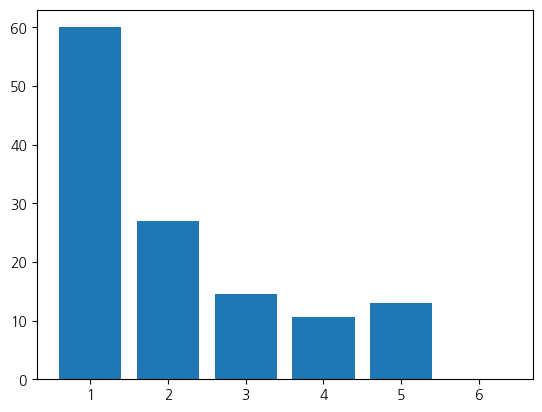

In [ ]:
plt.bar([1, 2, 3, 4, 5, 6], [age_10_p, age_20_p, age_30_p, age_40_p, age_50_p, age_60_p])

In [ ]:
# 직급에 따른 연봉

df['annual_s'] = df['MonthlyIncome'] * 12
df['annual_s']

0       71916
1       61560
2       25080
3       34908
4       41616
        ...  
995     48972
996     69228
997     28728
998     46848
999    201588
Name: annual_s, Length: 1000, dtype: int64

In [ ]:
job_annual_salary = df.groupby(['JobLevel'])['anuual_s'].mean()
job_annual_salary

JobLevel
Entry        33264.681081
Mid          65457.475504
Senior      118516.877419
Lead        185649.081081
Excutive    229540.888889
Name: anuual_s, dtype: float64

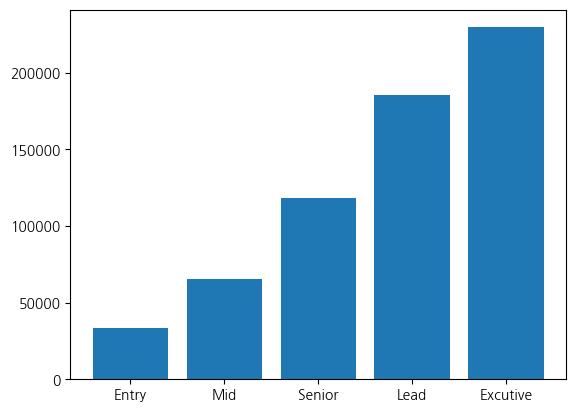

In [ ]:
plt.bar(job_annual_salary.index, job_annual_salary)
plt.show()

<Axes: xlabel='JobLevel', ylabel='annual_s'>

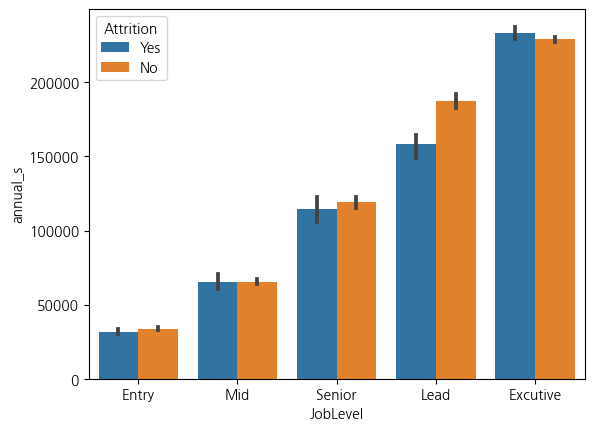

In [ ]:
sns.barplot(data=df, x='JobLevel', y='annual_s', hue='Attrition')

In [ ]:
# 성별에 따른 퇴사 비율

df['Gender'].value_counts()

Male      584
Female    416
Name: Gender, dtype: int64

In [ ]:
attrition_g = df['Gender'][df['Attrition'] == 'Yes']
attrition_g

0      Female
2        Male
14       Male
21       Male
24       Male
        ...  
975      Male
980    Female
981    Female
985      Male
997    Female
Name: Gender, Length: 167, dtype: object

In [ ]:
attrition_g[attrition_g == 'Male'].count()

103

In [ ]:
attrition_g[attrition_g == 'Female'].count()

64

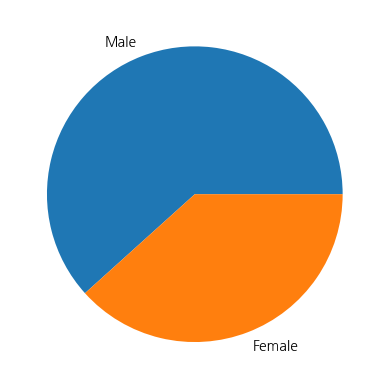

In [ ]:
plt.pie([attrition_g[attrition_g == 'Male'].count(), attrition_g[attrition_g == 'Female'].count()], labels=['Male', 'Female'])
plt.show()